In [1]:
# importing numpy and linear algebra library

In [2]:
import numpy as np
from numpy import dot
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d.axes3d import Axes3D
import functools
# 3D plotting



In [3]:
# Data generation

n_samples = 100

C = np.array([[.1, 2.1], [1.7, .4]])


X1 =[4,5]+ np.dot(np.random.randn(n_samples, 2), C)
X2 =[-4,-5]+ np.dot(np.random.randn(n_samples, 2), C)
X3 =[-5,5]+ np.dot(np.random.randn(n_samples, 2), C)
Y1 =  np.ones(n_samples).reshape((n_samples,1))
Y2 =  2*np.ones(n_samples).reshape((n_samples,1))
Y3 =  3*np.ones(n_samples).reshape((n_samples,1))

y = np.vstack([Y1,Y2,Y3])

print(y.shape)



(300, 1)


In [4]:
Quadratic = True

In [5]:

def features(X):
    if Quadratic:
        return np.column_stack([np.ones(X.shape[0]), X , X[:,0]*X[:,1], X*X])
    else:
        return np.column_stack([np.ones(X.shape[0]), X ])


def decision(X,y):
    index_1 = (y == 1)
    index_2 = (y == 2)
    index_3 = (y == 3)
    
    return X[index_1], X[index_2], X[index_3]
    

<IPython.core.display.Javascript object>


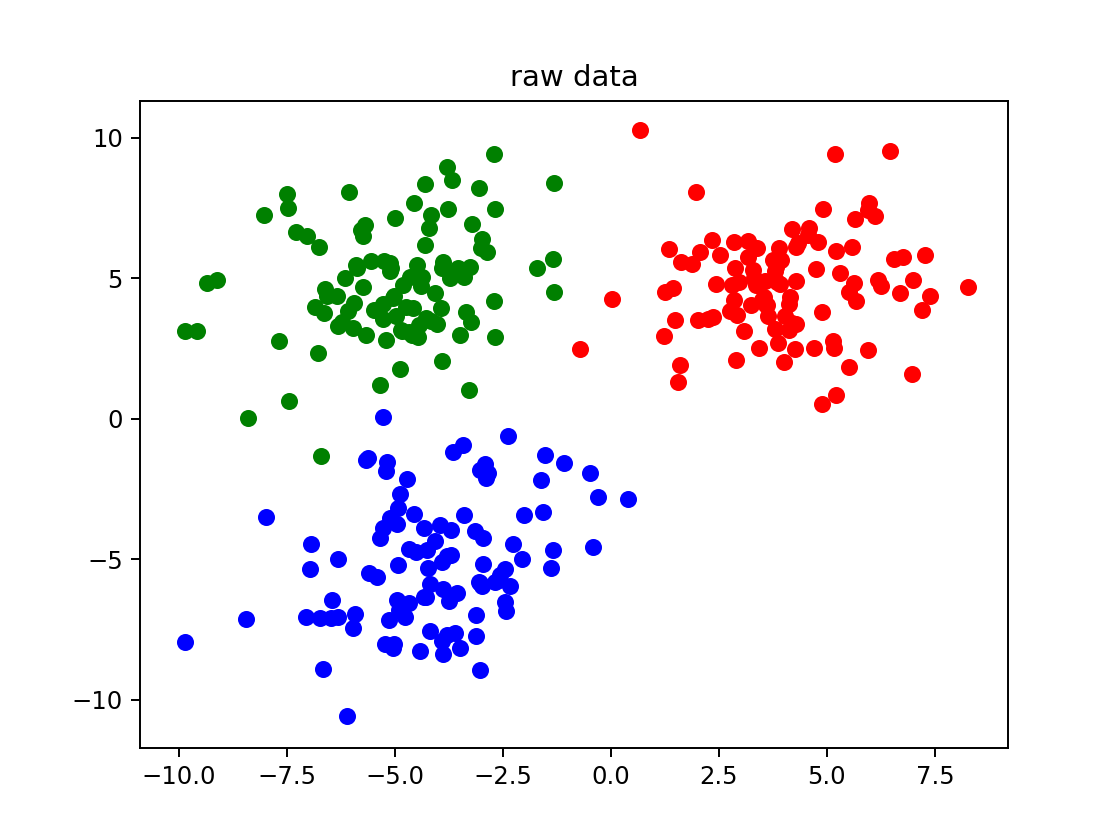

In [6]:
# 3D plotting
#X1,X2,X3 = decision(X,y)
fig = plt.figure()
ax = fig.add_subplot(111) # the projection arg is important!
ax.scatter(X1[:, 0], X1[:, 1], color="red")
ax.scatter(X2[:, 0], X2[:, 1], color="blue")
ax.scatter(X3[:, 0], X3[:, 1], color="green")
ax.set_title("raw data")
plt.draw()
# show, use plt.show() for blocking

In [7]:
def plotting(beta1,beta2,beta3):
    fig = plt.figure()
    
    
    x1 = np.linspace(-10,12,100)
    x2 = np.linspace(-10,12,100)

    X1,X2 = np.meshgrid(x1,x2)

    XX1 = beta1[0] + beta1[1] *X1 + beta1[2] *X2 
    if Quadratic:
        XX1 = XX1 + beta1[3]* X1*X2 +beta1[4]* X1 *X1 +beta1[5]* X2*X2
    
        
    XX2 = beta2[0] + beta2[1] *X1 + beta2[2] *X2 
    if Quadratic:
        XX2 = XX2 + beta2[3]* X1*X2 +beta2[4]* X1 *X1 +beta2[5]* X2*X2
   
    XX3 = beta3[0] + beta3[1] *X1 + beta3[2] *X2 
    if Quadratic:
        XX3 = XX3 + beta3[2] *X2 + beta3[3]* X1*X2 +beta3[4]* X1 *X1 +beta3[5]* X2*X2

    

    plt.contour(X1,X2, XX1,[0],colors='red')
    plt.contour(X1,X2, XX2,[0],colors='blue')
    plt.contour(X1,X2, XX3,[0],colors='green')
    
    print(XX1.shape)
    print(X1.shape)
    
    
        # 3D plotting
    X0,X1, X2 = decision(X,y)
    #fig = plt.figure()
    ax = fig.add_subplot(111) # the projection arg is important!
    ax.scatter(X0[:, 0], X0[:, 1], color="red")
    ax.scatter(X1[:, 0], X1[:, 1], color="blue")
    ax.scatter(X2[:, 0], X2[:, 1], color="green")
    
    ax.set_title("raw data")
    plt.draw()


    #plt.show()
    


(300, 2)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


<IPython.core.display.Javascript object>


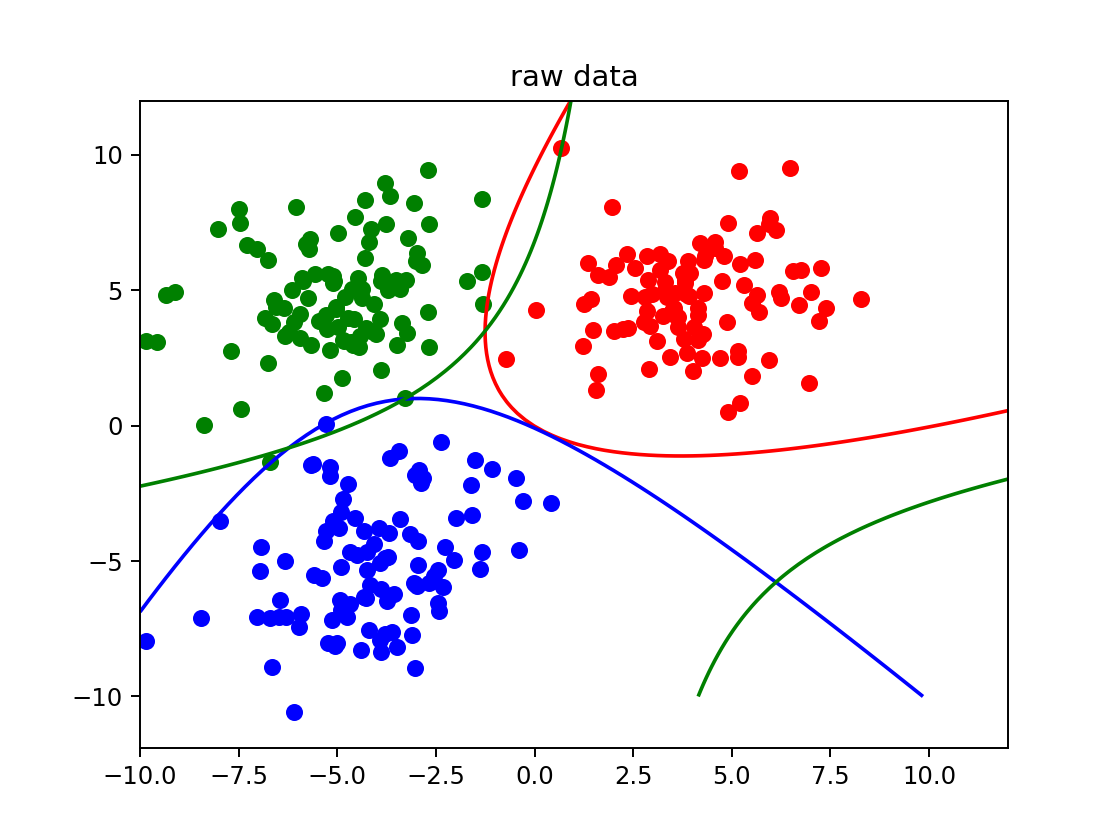

(100, 100)
(100, 100)


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [9]:
#using linear regression: adding a bias column into X
# prep for linear reg.

X = np.vstack([X1,X2,X3])

print(X.shape)
y= y.flatten()

X_linear= features(X)



beta1 = np.zeros([X_linear.shape[1],1])
beta2 = np.zeros([X_linear.shape[1],1])
beta3 = np.zeros([X_linear.shape[1],1])

I = np.identity(X_linear.shape[1])
lamda = 0.0
alpha = 0.01
num_iterations = 1000

for iter in range(num_iterations):
    # Re-compute the likelihood probability for all data points using three different discriminant functions
    # p1 using f(x,1)
    # p2 using f(x,2)
    # p3 using f(x,3)
    # This computation uses the updated betas (updated discriminant function)
    p1 = 1.0/(1.0+np.exp(-np.dot(X_linear,beta1)))
    p1=p1.flatten()  
    p2 = 1.0/(1.0+np.exp(-np.dot(X_linear,beta2)))
    p2=p2.flatten()  
    p3 = 1.0/(1.0+np.exp(-np.dot(X_linear,beta3)))
    p3=p3.flatten()  
   
    # Computing gradients w.r.t parameters of three different discriminant functions
    grad1 = np.dot(X_linear.T, p1-(y==1)) + 2*lamda* np.dot(I , beta1).flatten()
    grad1 = grad1.reshape(len(grad1),1)    
    beta1 = beta1 - alpha*grad1    
    beta1 = beta1.reshape(len(beta1),1)
    
    
    grad2 = np.dot(X_linear.T, p2-(y==2)) + 2*lamda* np.dot(I , beta2).flatten()
    grad2 = grad2.reshape(len(grad2),1)    
    beta2 = beta2 - alpha*grad2    
    beta2 = beta2.reshape(len(beta2),1)
    
    grad3 = np.dot(X_linear.T, p3-(y==3)) + 2*lamda* np.dot(I , beta3).flatten()
    grad3 = grad3.reshape(len(grad3),1)    
    beta3 = beta3 - alpha*grad3    
    beta3 = beta3.reshape(len(beta3),1)
    
        

plotting(beta1,beta2,beta3)


